# load dataset

In [6]:
#load dataset
import pandas as pd
# read the dataset using pandas
data = pd.read_csv('diabetes dataset.csv')

data.head()



Target Genetic Markers Autoantibodies  \
0          Steroid-Induced Diabetes        Positive       Negative   
1  Neonatal Diabetes Mellitus (NDM)        Positive       Negative   
2                       Prediabetic        Positive       Positive   
3                   Type 1 Diabetes        Negative       Positive   
4                  Wolfram Syndrome        Negative       Negative   

  Family History Environmental Factors  Insulin Levels  Age  BMI  \
0             No               Present              40   44   38   
1             No               Present              13    1   17   
2            Yes               Present              27   36   24   
3             No               Present               8    7   16   
4            Yes               Present              17   10   17   

  Physical Activity Dietary Habits  ...  Pulmonary Function  \
0              High        Healthy  ...                  76   
1              High        Healthy  ...                  60   
2              High      Unhealthy  ...                  80   
3               Low      Unhealthy  ...                  89   
4              High        Healthy  ...                  41   

   Cystic Fibrosis Diagnosis  Steroid Use History  Genetic Testing  \
0                         No                   No         Positive   
1                        Yes                   No         Negative   
2                        Yes                   No         Negative   
3                        Yes                   No         Positive   
4                         No                   No         Positive   

  Neurological Assessments Liver Function Tests Digestive Enzyme Levels  \
0                        3               Normal                      56   
1                        1               Normal                      28   
2                        1             Abnormal                      55   
3                        2             Abnormal                      60   
4                        1               Normal                      24   

        Urine Test Birth Weight Early Onset Symptoms  
0  Ketones Present         2629                   No  
1  Glucose Present         1881                  Yes  
2  Ketones Present         3622                  Yes  
3  Ketones Present         3542                   No  
4  Protein Present         1770                   No  

[5 rows x 34 columns]

#Data Exploration:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Target                         70000 non-null  object
 1   Genetic Markers                70000 non-null  object
 2   Autoantibodies                 70000 non-null  object
 3   Family History                 70000 non-null  object
 4   Environmental Factors          70000 non-null  object
 5   Insulin Levels                 70000 non-null  int64 
 6   Age                            70000 non-null  int64 
 7   BMI                            70000 non-null  int64 
 8   Physical Activity              70000 non-null  object
 9   Dietary Habits                 70000 non-null  object
 10  Blood Pressure                 70000 non-null  int64 
 11  Cholesterol Levels             70000 non-null  int64 
 12  Waist Circumference            70000 non-null  int64 
 13  B

In [7]:
import pandas as pd
#Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])
#Calculate basic statistics
statistics = numeric_data.describe().T
print(statistics)

                                count         mean         std     min  \
Insulin Levels                70000.0    21.607443   10.785852     5.0   
Age                           70000.0    32.020700   21.043173     0.0   
BMI                           70000.0    24.782943    6.014236    12.0   
Blood Pressure                70000.0   111.339543   19.945000    60.0   
Cholesterol Levels            70000.0   194.867200   44.532466   100.0   
Waist Circumference           70000.0    35.051657    6.803461    20.0   
Blood Glucose Levels          70000.0   160.701657   48.165547    80.0   
Weight Gain During Pregnancy  70000.0    15.496414    9.633096     0.0   
Pancreatic Health             70000.0    47.564243   19.984683    10.0   
Pulmonary Function            70000.0    70.264671   11.965600    30.0   
Neurological Assessments      70000.0     1.804157    0.680154     1.0   
Digestive Enzyme Levels       70000.0    46.420529   19.391089    10.0   
Birth Weight                  70000.0 

#Visualization:

In [2]:
numeric_data = data.select_dtypes(include=['number'])

Box plot

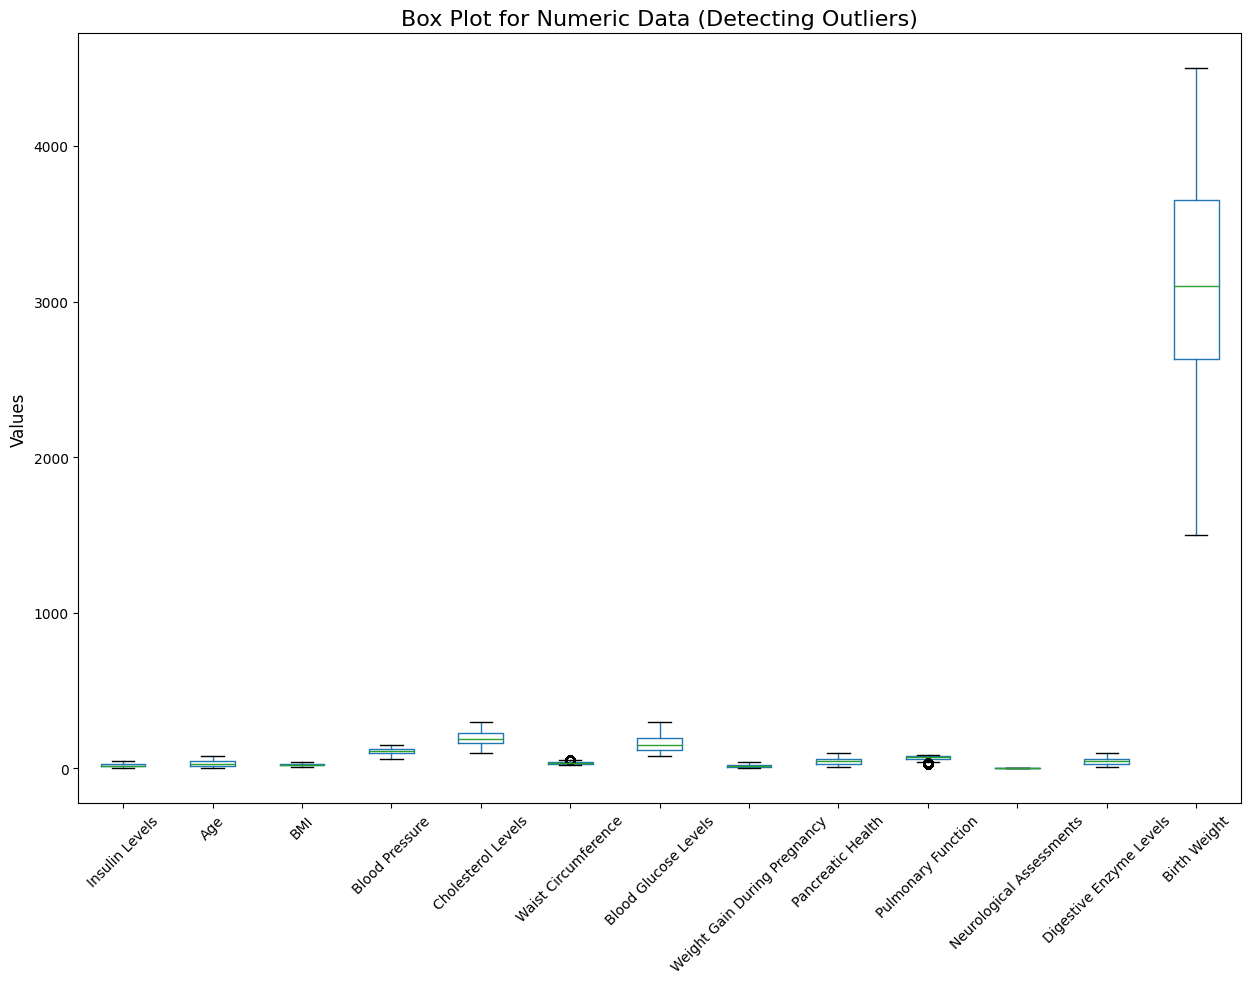

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
numeric_data.boxplot()
plt.title("Box Plot for Numeric Data (Detecting Outliers)", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel("Values", fontsize=12)
plt.grid(False)
plt.show()

scatter plots

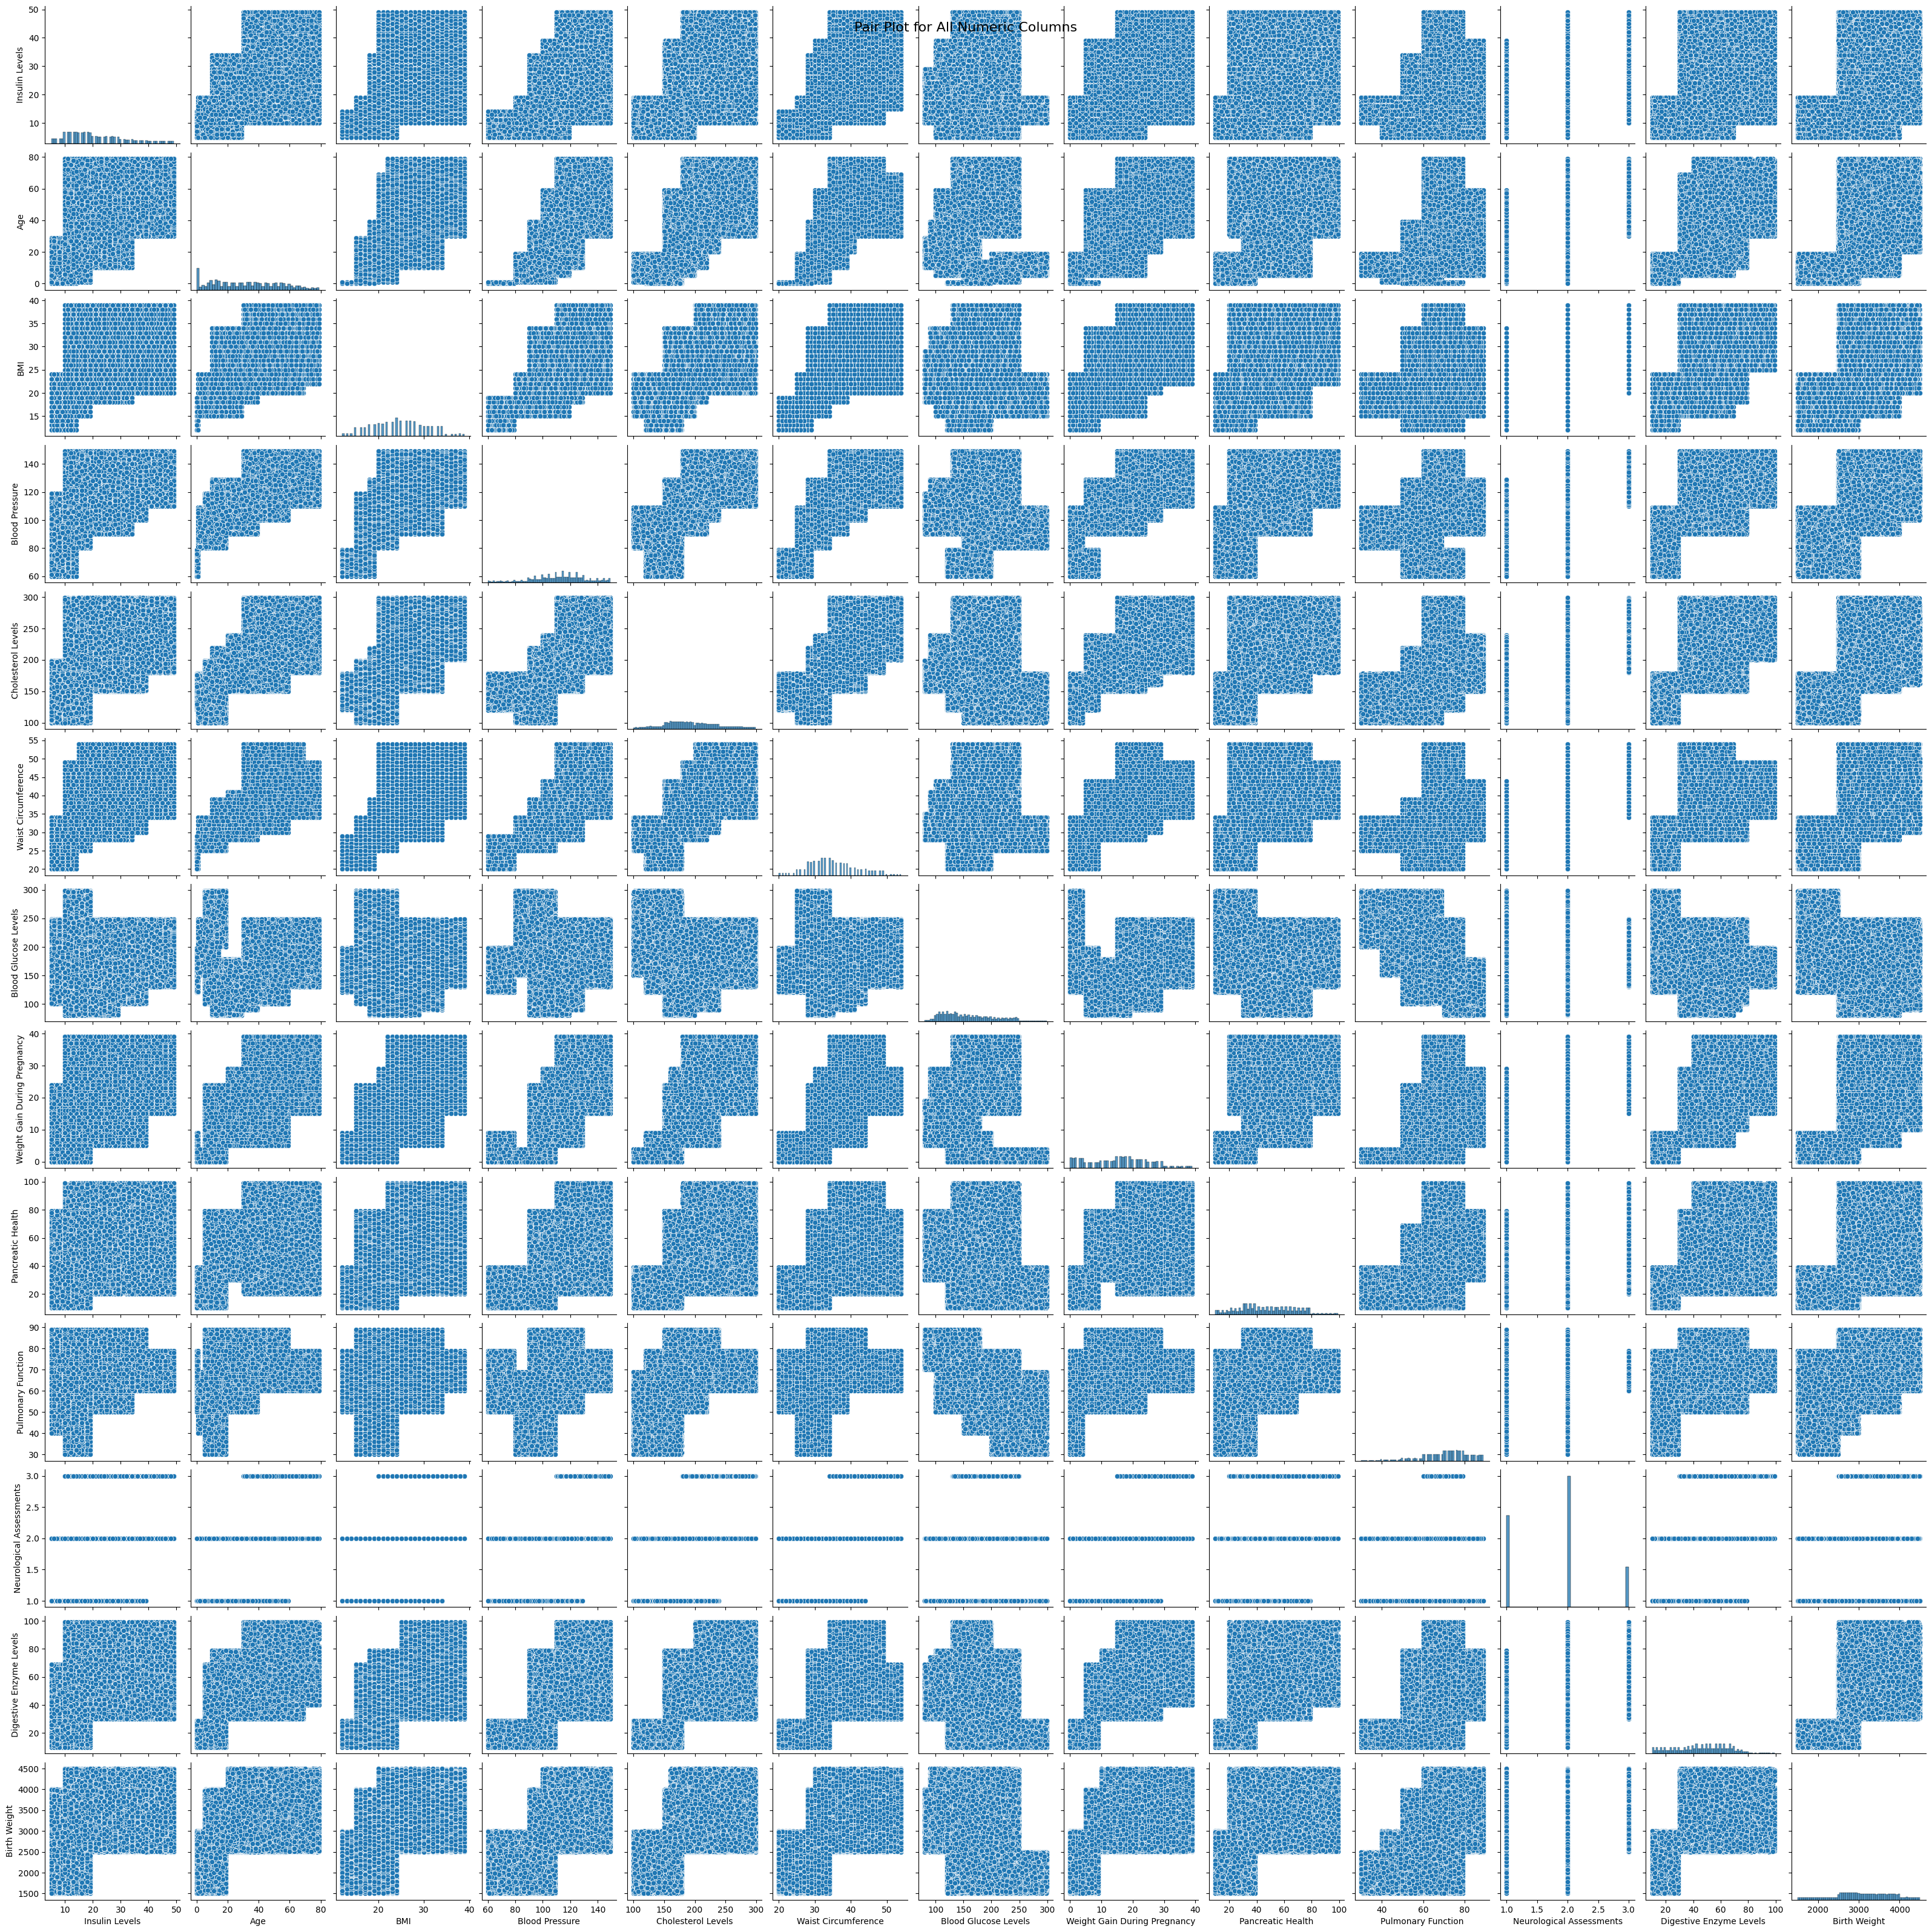

In [ ]:
sns.pairplot(numeric_data)
plt.suptitle("Pair Plot for All Numeric Columns", fontsize=16)
plt.show()

histograms

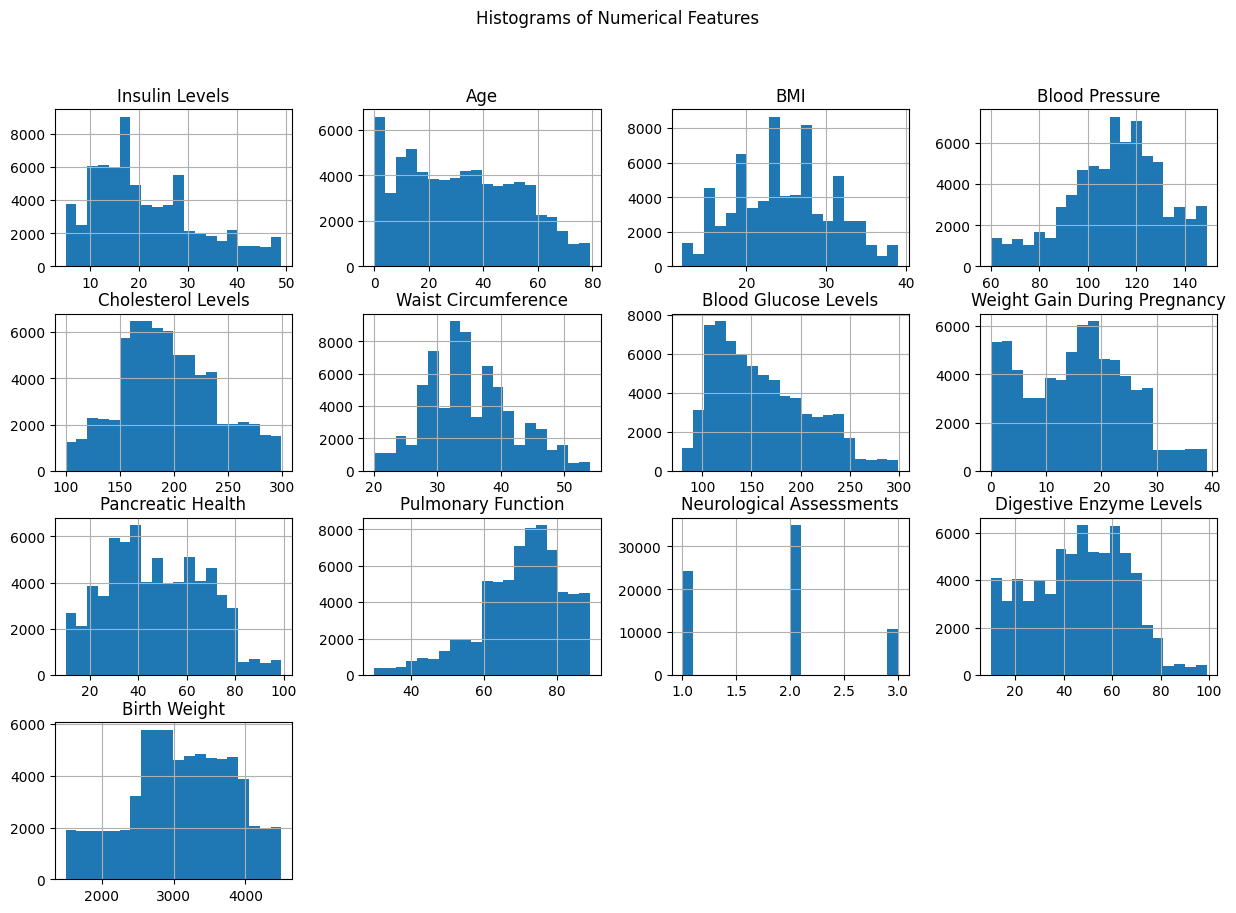

In [ ]:
# Plotting histograms for each numerical feature
numeric_data.hist(bins=20, figsize=(15,10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Data cleaning:

In [ ]:
data.isnull().sum()

Target                           0
Genetic Markers                  0
Autoantibodies                   0
Family History                   0
Environmental Factors            0
Insulin Levels                   0
Age                              0
BMI                              0
Physical Activity                0
Dietary Habits                   0
Blood Pressure                   0
Cholesterol Levels               0
Waist Circumference              0
Blood Glucose Levels             0
Ethnicity                        0
Socioeconomic Factors            0
Smoking Status                   0
Alcohol Consumption              0
Glucose Tolerance Test           0
History of PCOS                  0
Previous Gestational Diabetes    0
Pregnancy History                0
Weight Gain During Pregnancy     0
Pancreatic Health                0
Pulmonary Function               0
Cystic Fibrosis Diagnosis        0
Steroid Use History              0
Genetic Testing                  0
Neurological Assessments         0
Liver Function Tests             0
Digestive Enzyme Levels          0
Urine Test                       0
Birth Weight                     0
Early Onset Symptoms             0
dtype: int64

In [ ]:
duplicates_before = data.duplicated().sum()
print(f"Number of duplicate rows before removal: {duplicates_before}")

Number of duplicate rows before removal: 0


## IQR

In [9]:
import pandas as pd


data_cleaned = data.select_dtypes(include=['float64', 'int64'])

outliers = {}

for column in data_cleaned.columns:

    Q1 = data_cleaned[column].quantile(0.25)
    Q3 = data_cleaned[column].quantile(0.75)


    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers[column] = data_cleaned[(data_cleaned[column] < lower_bound) | (data_cleaned[column] > upper_bound)].shape[0]


print("IQR:")
for column, count in outliers.items():
    print(f"{column}: {count} outliers")


IQR:
Insulin Levels: 0 outliers
Age: 0 outliers
BMI: 0 outliers
Blood Pressure: 0 outliers
Cholesterol Levels: 0 outliers
Waist Circumference: 522 outliers
Blood Glucose Levels: 0 outliers
Weight Gain During Pregnancy: 0 outliers
Pancreatic Health: 0 outliers
Pulmonary Function: 1206 outliers
Neurological Assessments: 0 outliers
Digestive Enzyme Levels: 0 outliers
Birth Weight: 0 outliers


In [13]:

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1


outliers = (numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))


features_to_impute = ["Waist Circumference", "Pulmonary Function"]
for column in features_to_impute:
    median_value = numeric_data[column].median()
    numeric_data[column] = numeric_data[column].where(~outliers[column], median_value)


outliers_sum = outliers[features_to_impute].sum()
print("Number of outliers in the selected columns:")
print(outliers_sum)


print("\nData size after replacing outliers with the median:")
print(numeric_data.shape)


Number of outliers in the selected columns:
Waist Circumference    0
Pulmonary Function     0
dtype: int64

Data size after replacing outliers with the median:
(70000, 13)


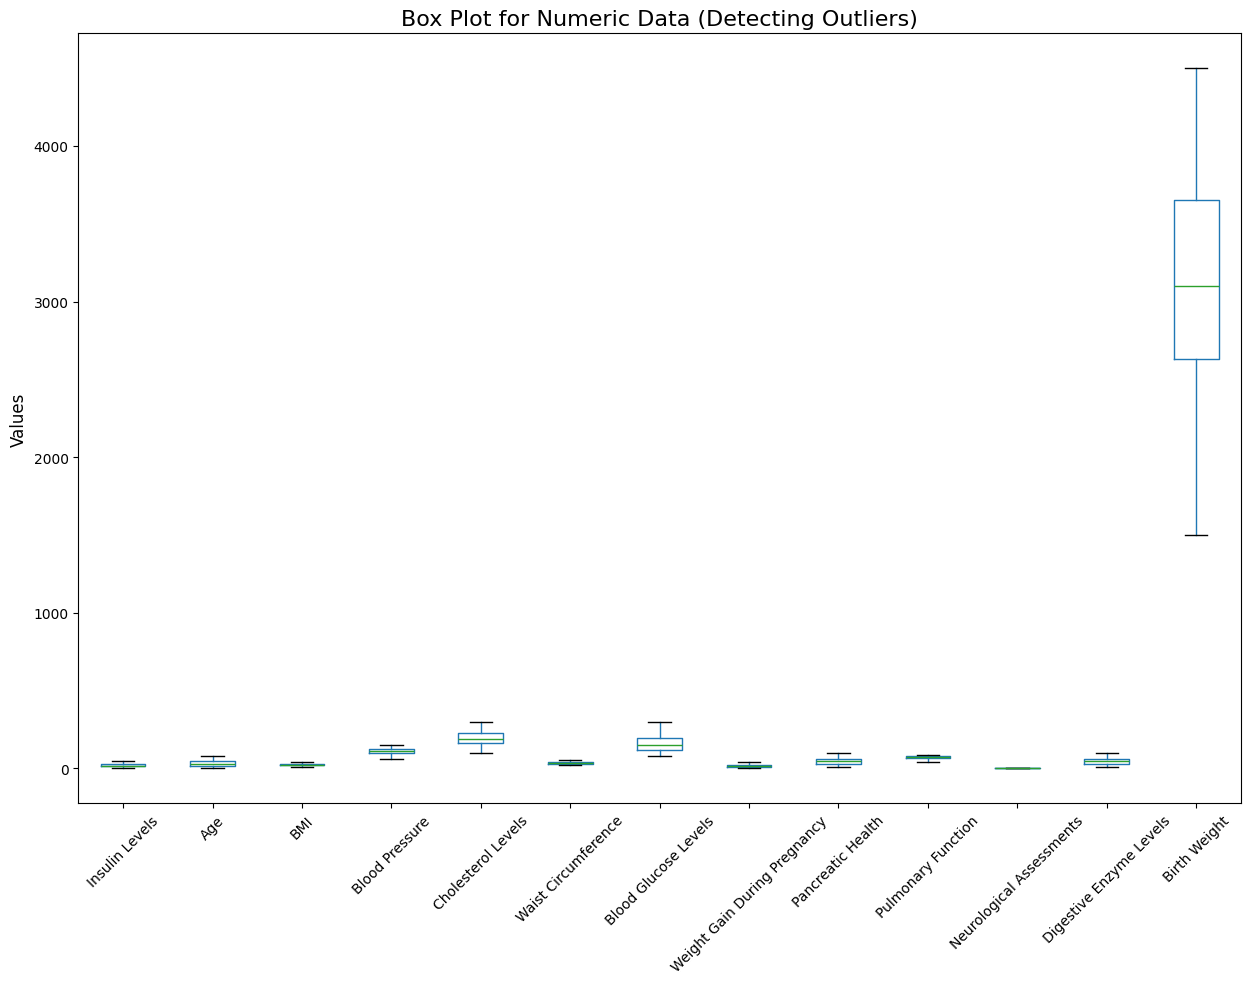

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
numeric_data.boxplot()
plt.title("Box Plot for Numeric Data (Detecting Outliers)", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel("Values", fontsize=12)
plt.grid(False)
plt.show()

# Feature Engineering:

## Variance

In [ ]:
variance=numeric_data.var()
print(variance)

Insulin Levels                     116.334604
Age                                442.815140
BMI                                 36.171031
Blood Pressure                     397.803022
Cholesterol Levels                1983.140552
Waist Circumference                 43.735368
Blood Glucose Levels              2319.919962
Weight Gain During Pregnancy        92.796541
Pancreatic Health                  399.387550
Pulmonary Function                 102.695390
Neurological Assessments             0.462609
Digestive Enzyme Levels            376.014342
Birth Weight                    509563.691452
dtype: float64


In [ ]:

data = data.drop(columns=["Neurological Assessments"])


print(data.columns)


Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Liver Function Tests',
       'Digestive Enzyme Levels', 'Urine Test', 'Birth Weight',
       'Early Onset Symptoms'],
      dtype='object')


## OneHotEncoder

In [15]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


categorical_columns = data.select_dtypes(include=['object']).columns


categorical_columns = categorical_columns[categorical_columns != 'Target']

encoder = OneHotEncoder(handle_unknown='ignore')


encoder.fit(data[categorical_columns])


encoded = encoder.transform(data[categorical_columns]).toarray()


encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded, columns=encoded_columns)




data = pd.concat([data, encoded_df], axis=1)


data = data.drop(columns=categorical_columns)


print(data.head())


                             Target  Insulin Levels  Age  BMI  Blood Pressure  \
0          Steroid-Induced Diabetes              40   44   38             124   
1  Neonatal Diabetes Mellitus (NDM)              13    1   17              73   
2                       Prediabetic              27   36   24             121   
3                   Type 1 Diabetes               8    7   16             100   
4                  Wolfram Syndrome              17   10   17             103   

   Cholesterol Levels  Waist Circumference  Blood Glucose Levels  \
0                 201                   50                   168   
1                 121                   24                   178   
2                 185                   36                   105   
3                 151                   29                   121   
4                 146                   33                   289   

   Weight Gain During Pregnancy  Pancreatic Health  ...  \
0                            18              

## LabelEncoder

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Target'] = label_encoder.fit_transform(data['Target'])


print(data.head())

   Target  Insulin Levels  Age  BMI  Blood Pressure  Cholesterol Levels  \
0       7              40   44   38             124                 201   
1       4              13    1   17              73                 121   
2       5              27   36   24             121                 185   
3       8               8    7   16             100                 151   
4      12              17   10   17             103                 146   

   Waist Circumference  Blood Glucose Levels  Weight Gain During Pregnancy  \
0                   50                   168                            18   
1                   24                   178                             8   
2                   36                   105                            15   
3                   29                   121                            12   
4                   33                   289                             2   

   Pancreatic Health  ...  Genetic Testing_Negative  Genetic Testing_Positive  \

## **RandomForestClassifier on Row data**

In [22]:

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

from sklearn.model_selection import cross_val_score
import time

X = data.drop(columns=['Target'])
y = data['Target']

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
start_time = time.time()

rf_raw =RandomForestClassifier(n_estimators=100, random_state=42)

rf_raw.fit(X_train_raw, y_train)


y_pred_raw = rf_raw.predict(X_test_raw)
training_time = time.time() - start_time

accuracy_raw = accuracy_score(y_test, y_pred_raw)
print(f'Accuracy on raw data: {accuracy_raw * 100:.2f}%')
recall = recall_score(y_test, y_pred_raw,average='macro')
print(f"Recall: {recall * 100:.2f}%")
precision = precision_score(y_test, y_pred_raw,average='macro')
print(f"Precision: {precision * 100:.2f}%")
# Cross-validation for consistency
cv_scores = cross_val_score(rf_raw, X_train_raw, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-validated Accuracy (Consistency): {cv_scores.mean() * 100:.2f}%")
#time
print(f"Training Time: {training_time:.2f} seconds")

Accuracy on raw data: 89.48%
Recall: 89.51%
Precision: 89.85%
Cross-validated Accuracy (Consistency): 89.66%
Training Time: 19.76 seconds


## Scale numerical features for consistency

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data =scaler.fit_transform(data)
scaled_data_df = pd.DataFrame(scaled_data, columns=data.columns)
print(scaled_data_df.head())

     Target  Insulin Levels       Age       BMI  Blood Pressure  \
0  0.270290        1.705261  0.569277  2.197644        0.634773   
1 -0.532337       -0.798037 -1.474156 -1.294096       -1.922277   
2 -0.264794        0.499969  0.189103 -0.130183        0.484358   
3  0.537833       -1.261610 -1.189026 -1.460369       -0.568545   
4  1.608002       -0.427178 -1.046461 -1.294096       -0.418130   

   Cholesterol Levels  Waist Circumference  Blood Glucose Levels  \
0            0.137716             2.197183              0.151527   
1           -1.658739            -1.624429              0.359146   
2           -0.221575             0.139392             -1.156471   
3           -0.985068            -0.889503             -0.824281   
4           -1.097347            -0.301563              2.663714   

   Weight Gain During Pregnancy  Pancreatic Health  ...  \
0                      0.259896          -0.578659  ...   
1                     -0.778199          -1.079046  ...   
2          

## PCA

In [18]:
from sklearn.decomposition import PCA



pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(scaled_data_df)
pca_data = pd.DataFrame(pca_data)
print(pca_data.head())




         0         1         2         3         4         5         6   \
0  2.584041  1.759651  0.375818 -0.358858 -0.525832  1.376637 -2.574143   
1 -4.436892 -0.432942  2.198066 -1.538823 -1.185547  1.411212 -0.524321   
2  0.701662 -1.635956 -0.613970 -0.562351  1.615157  0.563979  0.572206   
3 -1.309889 -1.809701 -2.803346 -0.131026 -0.598807 -1.725267 -0.867185   
4 -4.149032  3.456822  0.249244  0.583826 -0.343102  0.054735 -1.649507   

         7         8         9   ...        21        22        23        24  \
0  0.177514 -0.038432 -2.070886  ...  2.844597 -0.021998 -0.704805 -0.588252   
1 -0.699839  2.779882 -1.200257  ...  0.723055 -0.074157 -0.390817 -0.305256   
2 -1.692047  2.238478  0.156108  ...  2.871844 -0.121989 -0.708577 -0.612997   
3  2.001291  0.879904  0.316779  ... -0.850348 -1.371572  1.376553 -0.498913   
4  1.673832 -1.834199 -2.122501  ... -0.729075 -0.292336 -1.890915  1.914666   

         25        26        27        28        29        30  
0 -0

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    pca_data, y, test_size=0.2, random_state=42
)
print("Data train size:", X_train.shape)
print("Data Test size", X_test.shape)

Data train size: (56000, 31)
Data Test size (14000, 31)


Accuracy: 73.09%
Recall: 72.89%
Precision: 72.41%
Cross-validated Accuracy (Consistency): 72.86%
Training Time: 70.76 seconds


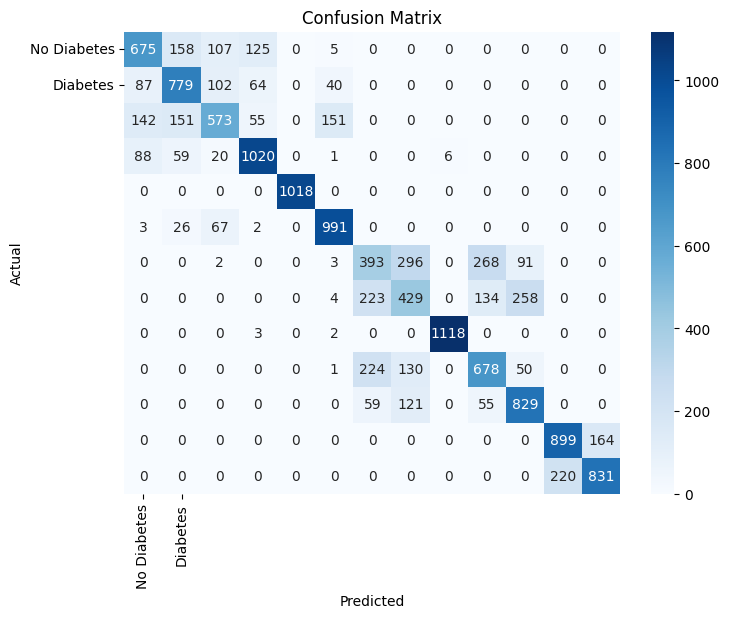

Training Time: 70.76 seconds


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Start timer to measure training time
start_time = time.time()

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Stop timer and calculate training time
training_time = time.time() - start_time

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall * 100:.2f}%")

precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision * 100:.2f}%")

# Cross-validation for consistency
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-validated Accuracy (Consistency): {cv_scores.mean() * 100:.2f}%")
#time
print(f"Training Time: {training_time:.2f} seconds")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print training time
print(f"Training Time: {training_time:.2f} seconds")


# Part 2: Comparative Analysis of Classification Techniques


## svm

In [3]:
pip install memory-profiler

In [24]:
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from memory_profiler import memory_usage


kernel_type = 'rbf'
C_value = 1

# Start training
start_train = time.time()
svm_model = SVC(kernel=kernel_type, C=C_value, gamma=0.1)
svm_model.fit(X_train, y_train)
train_time = time.time() - start_train

# Start prediction
start_predict = time.time()
y_pred = svm_model.predict(X_test)
predict_time = time.time() - start_predict


# Calculating accuracy, precision, recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Memory usage
mem = memory_usage()

# Print results
print(f"Kernel: {kernel_type}")
print(f"C: {C_value}")

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Prediction Time: {predict_time:.4f} seconds")
print(f"Memory Usage: {mem[0]:.2f} MB")


Kernel: rbf
C: 1
Accuracy: 64.58%
Precision: 64.44%
Recall: 64.43%
F1 Score: 64.38%
Training Time: 1383.0589 seconds
Prediction Time: 89.3172 seconds
Memory Usage: 1061.45 MB


## Multilayer Perceptron (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import time



start_time = time.time()
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    max_iter=200,
    random_state=42
)
mlp_model.fit(X_train, y_train)
training_time = time.time() - start_time

#  Make predictions
y_pred = mlp_model.predict(X_test)
predict_time = time.time() - start_predict
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
# Memory usage
mem = memory_usage()
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Prediction Time: {predict_time:.4f} seconds")
print(f"Memory Usage: {mem[0]:.2f} MB")
print('Confusion Matrix:', conf_mat)


Accuracy: 73.42%
Recall: 73.25%
Precision: 73.00%
F1 Score: 73.03%
Training Time: 126.31 seconds
Prediction Time: 868.8954 seconds
Memory Usage: 1838.05 MB
Confusion Matrix: [[ 650  178  145   96    0    1    0    0    0    0    0    0    0]
 [  87  812  102   58    0   13    0    0    0    0    0    0    0]
 [ 100  159  653   29    0  131    0    0    0    0    0    0    0]
 [ 111   53   35  993    0    0    0    0    2    0    0    0    0]
 [   0    0    0    0 1018    0    0    0    0    0    0    0    0]
 [   3    7   99    0    0  979    0    1    0    0    0    0    0]
 [   0    0    0    0    0    1  475  234    0  248   95    0    0]
 [   0    0    0    0    0    0  267  405    0  118  258    0    0]
 [   0    0    0    3    0    1    0    0 1119    0    0    0    0]
 [   0    0    0    0    0    0  286  104    0  636   57    0    0]
 [   0    0    0    0    0    0   56  136    0   40  832    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0  856  207]
 [   0    

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


##RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Start timer to measure training time
start_time = time.time()

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Stop timer and calculate training time
time = time.time() - start_time

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall * 100:.2f}%")

precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision * 100:.2f}%")
# Memory usage
mem = memory_usage()
print(f"Memory Usage: {mem[0]:.2f} MB")
#time
print(f" Time: {time:.2f} seconds")
#f1_score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1 * 100:.2f}%")





Accuracy: 73.21%
Recall: 73.02%
Precision: 72.56%
Memory Usage: 1827.93 MB
 Time: 73.15 seconds
F1 Score: 72.66%


# Parameter Tuning

## Random Forest

In [ ]:
pip install memory-profiler


In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from memory_profiler import memory_usage


n_estimators_list = [50, 100, 200]




for n_trees in n_estimators_list:

        print(f"\nTesting Random Forest with n_estimators={n_trees} :")

        # Start training
        start_train = time.time()
        rf_model = RandomForestClassifier(n_estimators=n_trees, random_state=123)
        rf_model.fit(X_train, y_train)
        train_time = time.time() - start_train

        # Start prediction
        start_predict = time.time()
        y_pred = rf_model.predict(X_test)
        predict_time = time.time() - start_predict

        # Calculating metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f_measure = f1_score(y_test, y_pred, average='macro')

        # Memory usage
        mem = memory_usage()

        # Print results
        print(f"Number of Trees: {n_trees}")
        print(f"Random State: {random_state}")
        print(f"Accuracy: {accuracy * 100:.2f}%")
        print(f"Precision: {precision * 100:.2f}%")
        print(f"Recall: {recall * 100:.2f}%")
        print(f"F-Measure: {f_measure * 100:.2f}%")
        print(f"Training Time: {train_time:.4f} seconds")
        print(f"Prediction Time: {predict_time:.4f} seconds")
        print(f"Memory Usage: {mem[0]:.2f} MB")



Testing Random Forest with n_estimators=50 :
Number of Trees: 50
Random State: 0
Accuracy: 72.62%
Precision: 72.03%
Recall: 72.43%
F-Measure: 72.13%
Training Time: 36.7893 seconds
Prediction Time: 0.2707 seconds
Memory Usage: 1635.64 MB

Testing Random Forest with n_estimators=100 :
Number of Trees: 100
Random State: 0
Accuracy: 73.21%
Precision: 72.56%
Recall: 73.02%
F-Measure: 72.66%
Training Time: 69.5929 seconds
Prediction Time: 0.4432 seconds
Memory Usage: 1827.82 MB

Testing Random Forest with n_estimators=200 :
Number of Trees: 200
Random State: 0
Accuracy: 73.52%
Precision: 72.84%
Recall: 73.33%
F-Measure: 72.94%
Training Time: 138.5221 seconds
Prediction Time: 0.9319 seconds
Memory Usage: 2213.21 MB


## SVM

In [ ]:
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from memory_profiler import memory_usage

C_values = [0.1, 1, 10]


param_grid = {
    'gamma': [0.01, 0.1, 1]
}


for C_value in C_values:
    print(f"Testing with C={C_value}")


    svm_model = SVC(kernel='rbf', C=C_value)


    grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')


    start_train = time.time()
    grid_search.fit(X_train, y_train)
    train_time = time.time() - start_train

    best_gamma = grid_search.best_params_['gamma']
    print(f"Best gamma for C={C_value}: {best_gamma}")


    start_predict = time.time()
    y_pred = grid_search.predict(X_test)
    predict_time = time.time() - start_predict


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')


    mem = memory_usage()


    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1 Score: {f1 * 100:.2f}%")
    print(f"Training Time: {train_time:.4f} seconds")
    print(f"Prediction Time: {predict_time:.4f} seconds")
    print(f"Memory Usage: {mem[0]:.2f} MB")
    print("\n" + "-"*50)


Testing with C=0.1
Best gamma for C=0.1: 0.01
Accuracy: 72.54%
Precision: 71.92%
Recall: 72.33%
F1 Score: 71.99%
Training Time: 4780.2148 seconds
Prediction Time: 74.7051 seconds
Memory Usage: 1840.67 MB

--------------------------------------------------
Testing with C=1
Best gamma for C=1: 0.01
Accuracy: 73.19%
Precision: 72.65%
Recall: 73.01%
F1 Score: 72.75%
Training Time: 4794.8450 seconds
Prediction Time: 57.5758 seconds
Memory Usage: 1841.70 MB

--------------------------------------------------
Testing with C=10
Best gamma for C=10: 0.01
Accuracy: 71.65%
Precision: 71.29%
Recall: 71.48%
F1 Score: 71.36%
Training Time: 4568.4192 seconds
Prediction Time: 54.0606 seconds
Memory Usage: 1842.22 MB

--------------------------------------------------


## MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import time
from memory_profiler import memory_usage
hidden_layer_sizes_values = [(50,), (100,), (150,)]


for hidden_layer_sizes in hidden_layer_sizes_values:

        print(f"\nTesting with hidden_layer_sizes={hidden_layer_sizes} ")

        start_time = time.time()
        mlp_model = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            activation='relu',
            solver='adam',
            max_iter=200,
            random_state=42
        )
        mlp_model.fit(X_train, y_train)
        training_time = time.time() - start_time


        start_predict = time.time()
        y_pred = mlp_model.predict(X_test)
        predict_time = time.time() - start_predict

        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        conf_mat = confusion_matrix(y_test, y_pred)


        mem = memory_usage()





        print(f"Accuracy: {accuracy * 100:.2f}%")
        print(f"Recall: {recall * 100:.2f}%")
        print(f"Precision: {precision * 100:.2f}%")
        print(f"F1 Score: {f1 * 100:.2f}%")
        print(f"Training Time: {training_time:.2f} seconds")
        print(f"Prediction Time: {predict_time:.4f} seconds")
        print(f"Memory Usage: {mem[0]:.2f} MB")
        print('Confusion Matrix:', conf_mat)
        print("\n" + "-"*50)



Testing with hidden_layer_sizes=(50,) 


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 74.16%
Recall: 73.95%
Precision: 73.58%
F1 Score: 73.44%
Training Time: 84.22 seconds
Prediction Time: 0.0174 seconds
Memory Usage: 1837.62 MB
Confusion Matrix: [[ 663  155  138  112    0    1    0    1    0    0    0    0    0]
 [  79  802  116   62    0   13    0    0    0    0    0    0    0]
 [  99  145  637   49    0  142    0    0    0    0    0    0    0]
 [  77   45   35 1034    0    1    0    0    2    0    0    0    0]
 [   0    0    0    0 1018    0    0    0    0    0    0    0    0]
 [   2    5   86    1    0  994    0    0    1    0    0    0    0]
 [   0    0    0    0    0    0  313  319    0  328   93    0    0]
 [   0    0    0    0    0    0  146  490    0  154  258    0    0]
 [   0    0    0    3    0    1    0    0 1119    0    0    0    0]
 [   0    0    0    0    0    0  170  132    0  730   51    0    0]
 [   0    0    0    0    0    0   24  140    0   62  838    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0  937  126]
 [   0    0  

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 73.42%
Recall: 73.25%
Precision: 73.00%
F1 Score: 73.03%
Training Time: 128.34 seconds
Prediction Time: 0.0262 seconds
Memory Usage: 1837.62 MB
Confusion Matrix: [[ 650  178  145   96    0    1    0    0    0    0    0    0    0]
 [  87  812  102   58    0   13    0    0    0    0    0    0    0]
 [ 100  159  653   29    0  131    0    0    0    0    0    0    0]
 [ 111   53   35  993    0    0    0    0    2    0    0    0    0]
 [   0    0    0    0 1018    0    0    0    0    0    0    0    0]
 [   3    7   99    0    0  979    0    1    0    0    0    0    0]
 [   0    0    0    0    0    1  475  234    0  248   95    0    0]
 [   0    0    0    0    0    0  267  405    0  118  258    0    0]
 [   0    0    0    3    0    1    0    0 1119    0    0    0    0]
 [   0    0    0    0    0    0  286  104    0  636   57    0    0]
 [   0    0    0    0    0    0   56  136    0   40  832    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0  856  207]
 [   0    0 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
